In [31]:
import numpy as np
import matplotlib.pylab as plt
import glob
from scipy import signal
import scipy

glob.glob('*')

['MokuDataLoggerData_20230223_150002.li',
 'converted_1_30pm',
 '1_39',
 'debug.log',
 'MokuDataLoggerData_20230223_150002.csv',
 'feb_14',
 'analysis.ipynb']

In [4]:
time, volt = np.genfromtxt('MokuDataLoggerData_20230223_150002.csv', comments ='%', delimiter = ',').T

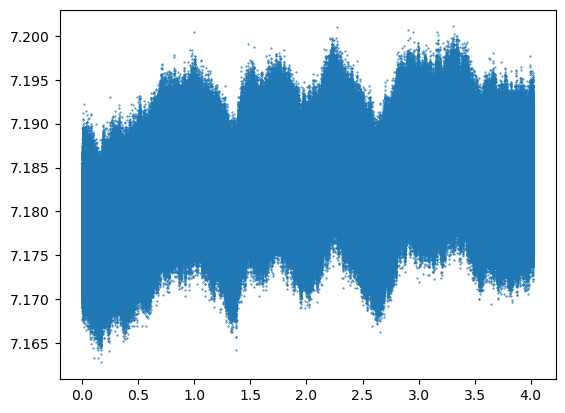

In [91]:
plt.scatter(time, volt, s = .2)

In [94]:
spacing  = np.median(np.diff(time))
freqs = np.fft.rfftfreq(len(time), spacing)
window = signal.windows.tukey(len(time), alpha = .3)
fft = np.fft.rfft(volt*window)
ps = np.abs(fft)**2

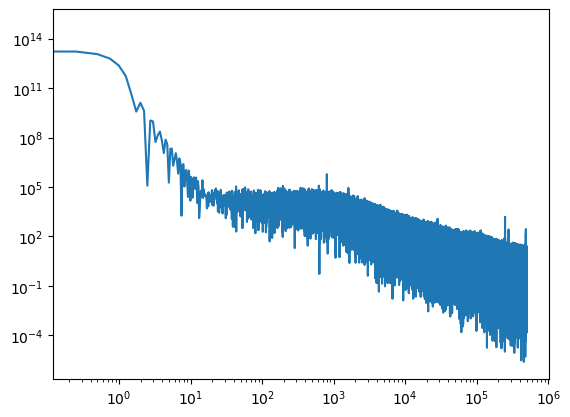

In [95]:
plt.loglog(freqs, ps)

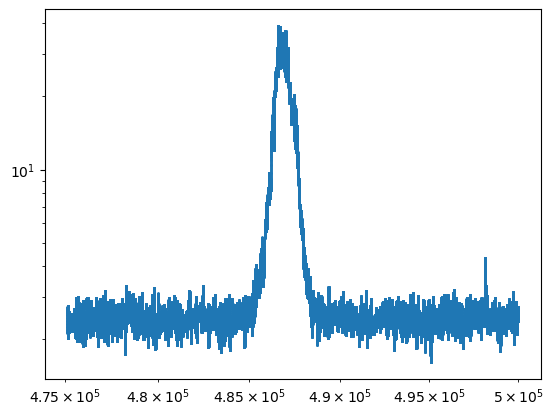

In [96]:
smooth = scipy.ndimage.gaussian_filter1d(ps, sigma = 30)
plt.loglog(freqs[-100000:], smooth[-100000:], marker= 'o', ms = 1, ls = 'None')

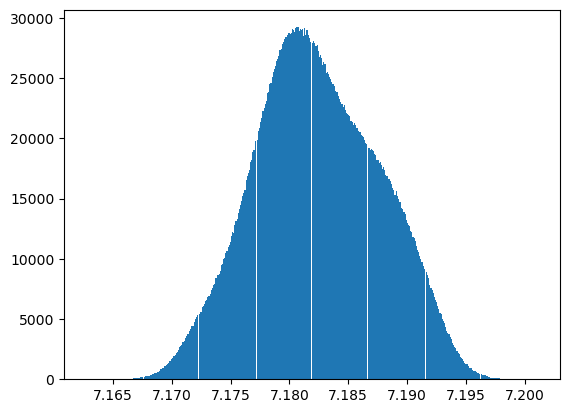

In [100]:
plt.hist(volt, bins = 400);

**Simply average over longer time (eg. 4 seconds, at 1 Mb/s). If the plots don't make sense to you, then hault the thing.
Convert files to npy and delete after saving the autocorrelation trace to save space.**